In [1]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
import tensorflow
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.font_manager as fm
import matplotlib
%matplotlib inline
plt.style.use('ggplot')

font_location = 'C:/Windows/Fonts/malgunsl.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)

import sklearn.metrics as metrics
import warnings


from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from xgboost import plot_importance
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.univariate_selection module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
Child_Abuser = pd.read_csv("./Child_Abuser_New_action_days.csv",encoding = 'CP949')
Child_Abuser

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4,20,22,23,26,30,31,32,45,50,175) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,개별사건번호,피해아동대상자,학대행위자대상,아동_성별,아동_연령대,아동_내국인여부,아동_최종학력,아동_직업유형,아동_거주상태,아동_친권자유형,...,행특_애착문제,행특_지체장애,행특_원치않는아동,행특_도박중독,행특_심장장애,행특_급만성질병,행특_거짓말,행특_약물남용,행특_성문제,New_조치걸린일수
0,0102010220141200510001,CASRCP20121010398,CASRCP20121020314,M,NaN,내국인,NaN,NaN,자택,양부모,...,0,0,0,0,0,0,0,0,0,NaN
1,0804080420141200220001,CASRCP20150110545,CASRCP20150120502,M,NaN,내국인,NaN,NaN,기타,친부모,...,0,0,0,0,0,0,0,0,0,229.0
2,0402040220141200170001,CASRCP20141211229,CASRCP20141221114,M,NaN,내국인,NaN,NaN,NaN,친부,...,0,0,0,0,0,0,0,0,0,NaN
3,0402040220141200160001,CASRCP20141211178,CASRCP20141221114,F,NaN,내국인,NaN,NaN,NaN,친부,...,0,0,0,0,0,0,0,0,0,NaN
4,0106080420141200200001,CASRCP20141211459,CASRCP20141221403,F,NaN,내국인,NaN,NaN,보증금(전세)+월세,친부모,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122037,5801580120180165450001,CASRCP20180100595,CASRCP20180100597,M,1~3세,내국인,NaN,어린이집,NaN,친모,...,0,0,0,0,0,0,0,0,0,3.0
122038,5115511520180165080001,CASRCP20180100289,CASRCP20180100290,F,13~15세,내국인,재학중,초등학교,NaN,친모,...,0,0,0,0,0,0,0,0,0,9.0
122039,6404640420180167080001,CASRCP20180102065,CASRCP20180102067,F,NaN,NaN,NaN,NaN,NaN,친부모,...,0,0,0,0,0,0,0,0,0,NaN
122040,5715571520180166300001,CASRCP20180101264,CASRCP20180101266,M,1~3세,내국인,재학중,어린이집,NaN,친부모,...,0,0,0,0,0,0,0,0,0,NaN


In [3]:
for i in range(len(Child_Abuser.columns)):
    print(i, Child_Abuser.columns[i])

0 개별사건번호
1 피해아동대상자
2 학대행위자대상
3 아동_성별
4 아동_연령대
5 아동_내국인여부
6 아동_최종학력
7 아동_직업유형
8 아동_거주상태
9 아동_친권자유형
10 아동_가족유형
11 아동_다문화가족
12 아동_가구소득구분코
13 아동_기초생활수급유
14 아동_특성_관찰
15 아동_주요병력
16 아동_보호조치유형
17 신고_접수경로구분코
18 신고_접수일시
19 신고_신고자유형구분
20 신고_통보경찰소속기
21 신고_집단시설내사건
22 신고_재신고여부_1
23 신고_재신고유형
24 신고_재신고이전접수
25 신고_접수유형
26 신고_관할지구대
27 신고_신고접수구분
28 신고_접수자소속기관
29 신고_관할지역ID
30 신고_관련키워드
31 신고_피해아동상태구
32 신고_재신고센터ID
33 신고_관할지역기관I
34 신고_관리센터ID
35 신대_행위자아동관계
36 신대_아동동거여부
37 신대_접수유형
38 신대_재신고여부
39 신대_재신고유형_1
40 신대_재신고센터ID
41 신대_재신고이전
42 신대_통계거점
43 신대_통계기관
44 신대_통계관할지역
45 조사_집단시설내사건
46 조사_조사완료여부
47 조사_관할지역ID_
48 조사_관할지역기관I
49 아동_위험점수
50 아동_위험유형
51 조대_재신고여부_1
52 조대_재신고유형구분
53 조대_재신고관리기관
54 조대_재신고이전사건
55 조대_동일신고여부
56 조대_아동동거여부
57 조대_특별관리유형
58 판단_학대혐의여부
59 판단_유형_신체
60 판단_유형_정서
61 판단_유형_성
62 판단_유형_방임
63 판단_유형_유기
64 판단_학대발생빈도
65 결과_조치결과일자
66 결과_아동조치결과
67 결과_행위자조치결과
68 신고_접수연도
69 아특_난독해
70 아특_약물
71 아특_잦은결석
72 아특_양육지식부족
73 아특_늦은귀가
74 아특_잦은병치례
75 아특_성문제
76 아특_장애의심
77 아특_기타
78 아특_주의산만
79 아특_신체발달지연
80 아특_나태_무기력
81 아특_종교문제
8

In [4]:
# 학대혐의 Y 이자 재학대혐의여부에 값이 있는 아이들
# 80095 rows

Child_Abuser = Child_Abuser.dropna(axis=0,subset=['New_재학대혐의여부'])
Child_Abuser

,개별사건번호,피해아동대상자,학대행위자대상,아동_성별,아동_연령대,아동_내국인여부,아동_최종학력,아동_직업유형,아동_거주상태,아동_친권자유형,...,행특_애착문제,행특_지체장애,행특_원치않는아동,행특_도박중독,행특_심장장애,행특_급만성질병,행특_거짓말,행특_약물남용,행특_성문제,New_조치걸린일수
1,0804080420141200220001,CASRCP20150110545,CASRCP20150120502,M,NaN,내국인,NaN,NaN,기타,친부모,...,0,0,0,0,0,0,0,0,0,229.0
7,0806080620141200290001,CASRCP20150110903,CASRCP20150120827,F,NaN,내국인,NaN,NaN,자택,친부모,...,0,0,0,0,0,0,0,0,0,376.0
9,0810010420141200070001,CASRCP20150210146,CASRCP20141221354,F,NaN,내국인,NaN,NaN,자택,친부모,...,0,0,0,0,0,0,0,0,0,371.0
14,0104010420141200080001,CASRCP20150210367,CASRCP20141221398,F,NaN,내국인,NaN,NaN,월세,친부,...,0,0,0,0,0,0,0,0,0,328.0
15,1103110320141200100001,CASRCP20140810269,CASRCP20150120430,F,NaN,내국인,NaN,NaN,월세,친부,...,0,0,0,0,0,0,0,0,0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122034,5506550620180165980001,CASRCP20180101087,CASRCP20180101089,M,10~12세,내국인,재학중,초등학교,NaN,친부모,...,0,0,0,0,0,0,0,0,0,8.0
122035,0805080520180100010001,CASRCP20180102176,CASRCP20180102182,M,16~17세,내국인,재학중,고등학교,자택,친부모,...,0,0,0,0,0,0,0,0,0,7.0
122036,5305530520180166200001,CASRCP20170111840,CASRCP20180103665,F,4~6세,내국인,NaN,NaN,보증금(전세)+월세,친부모,...,0,0,1,0,0,0,0,0,0,258.0
122037,5801580120180165450001,CASRCP20180100595,CASRCP20180100597,M,1~3세,내국인,NaN,어린이집,NaN,친모,...,0,0,0,0,0,0,0,0,0,3.0


In [5]:
All_columns = ['아동_가구소득구분코','아동_기초생활수급유','신고_접수경로구분코','신고_재신고유형',
               '판단_학대발생빈도', '아동_위험유형','행위_위험유형','결과_아동조치결과','결과_행위자조치결과',
               '신고_접수연도','New_재학대혐의여부']

In [6]:
Child_Abuser = Child_Abuser[All_columns]
Child_Abuser

,아동_가구소득구분코,아동_기초생활수급유,신고_접수경로구분코,신고_재신고유형,판단_학대발생빈도,아동_위험유형,행위_위험유형,결과_아동조치결과,결과_행위자조치결과,신고_접수연도,New_재학대혐의여부
1,NaN,비수급권대상,112,NaN,일회성,NaN,NaN,원가정보호,모니터링,2014.0,N
7,300만원이상,비수급권대상,112,NaN,일회성,NaN,NaN,원가정보호,고소/고발/사건처리,2014.0,N
9,150만원이상-200만원미만,수급권대상,아동보호전문기관일반전화,NaN,6개월에 한번,NaN,NaN,분리조치,"모니터링,아동과의분리",2014.0,N
14,150만원이상-200만원미만,비수급권대상,112,NaN,일회성,NaN,NaN,"분리조치,원가정보호",모니터링,2014.0,N
15,50만원미만,비수급권대상,아동보호전문기관일반전화,사례진행중 재신고,거의 매일,NaN,NaN,"분리조치,원가정보호",고소/고발/사건처리,2014.0,Y
...,...,...,...,...,...,...,...,...,...,...,...
122034,NaN,NaN,112,NaN,일회성,"05,09,07","05,09",원가정보호,모니터링,2018.0,N
122035,NaN,비수급권대상,아동보호전문기관일반전화,NaN,일회성,"01,05,03","05,09",원가정보호,모니터링,2018.0,N
122036,250만원이상-300만원미만,비수급권대상,112,NaN,6개월에 한번,"03,09,08,07","02,10,09,06,05","분리조치,원가정보호",모니터링,2018.0,Y
122037,NaN,NaN,112,NaN,일회성,NaN,"01,10,09,03",원가정보호,모니터링,2018.0,N


- 바로더미화 -> 아동_가구소득구분코, 아동_기초생활수급유, 신고_접수경로구분코, 신고_재신고유형, 판단_학대발생빈도
- 나눠야 할 것 -> 아동_위험유형, 행위_위험유형, 결과_아동조치결과, 결과_행위자조치결과

- New_재학대 혐의여부는 1, 0으로 바꿀것

### New_재학대혐의여부 1,0으로 바꾸기

In [7]:
# 시간걸림
for i in Child_Abuser.index:
    if (Child_Abuser.loc[i,'New_재학대혐의여부'] == 'Y'):
        Child_Abuser.loc[i,'New_재학대혐의여부'] = 1
    if (Child_Abuser.loc[i,'New_재학대혐의여부'] == 'N'):
        Child_Abuser.loc[i,'New_재학대혐의여부'] = 0

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
Child_Abuser['New_재학대혐의여부'].unique()

array([0, 1], dtype=object)

### 나눠야 할 것 1) 아동_위험유형

In [9]:
Child_Abuser['아동_위험유형']

1                 NaN
7                 NaN
9                 NaN
14                NaN
15                NaN
             ...     
122034       05,09,07
122035       01,05,03
122036    03,09,08,07
122037            NaN
122038          01,03
Name: 아동_위험유형, Length: 80095, dtype: object

In [10]:
Child_Abuser['아동_위험유형'].value_counts()

01,03                2003
03                   1799
01,05,03             1610
01,07,03             1226
03,07                1082
                     ... 
01,09,08,06,05,02       1
04,07,06,05             1
02,06,04                1
01,08,07,06,05,02       1
3.0                     1
Name: 아동_위험유형, Length: 442, dtype: int64

In [11]:
sc = []
count =0

for i in Child_Abuser.index:
    try:
        for j in range(len(Child_Abuser.loc[i,'아동_위험유형'].split(','))):
            sc.append(Child_Abuser.loc[i,'아동_위험유형'].split(',')[j])
    except AttributeError:
        sc.append(np.nan)
    count+=1
    
print(count)
print(len(sc))

80095
150573


In [12]:
sc

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [13]:
s = pd.Series(sc)    # 시리즈화
s.value_counts()     # 특성별 개수파악

03    25826
01    18933
07    13515
05    12282
08    11579
09    10114
06     5996
02     3283
04     2297
10       32
dtype: int64

In [14]:
sc_value = list(set(sc)) # sc의 구성요소가 무엇인지 뽑아내기
sc_value

[nan, '09', '03', '05', '10', '01', '07', '06', '02', '04', '08']

In [15]:
# 위험도평가척도 항목을 각각 변수로 더미화시키기위해 DataFrame생성 
df_sc = pd.DataFrame(0,index=Child_Abuser.index, columns=sc_value)
df_sc = df_sc.drop([np.nan,'10'],axis=1)
df_sc = df_sc[['01','02','03','04','05','06','07','08','09']]
df_sc

,01,02,03,04,05,06,07,08,09
1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
122034,0,0,0,0,0,0,0,0,0
122035,0,0,0,0,0,0,0,0,0
122036,0,0,0,0,0,0,0,0,0
122037,0,0,0,0,0,0,0,0,0


In [16]:
#5분?걸림
#split한 고유의 특성 값이 있으면 DataFrame에 1로 채움 
for i in Child_Abuser.index:
    for j in df_sc.columns: # 컬럼명과 일치성여부
        try:
            for k in range(len(Child_Abuser.loc[i,'아동_위험유형'].split(','))): # 컬럼명과 일치하면 삽입
                if (Child_Abuser.loc[i,'아동_위험유형'].split(',')[k]==j):
                    df_sc[j][i]=1
                    continue
        except:
            continue

In [17]:
df_sc

,01,02,03,04,05,06,07,08,09
1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
122034,0,0,0,0,1,0,1,0,1
122035,1,0,1,0,1,0,0,0,0
122036,0,0,1,0,0,0,1,1,1
122037,0,0,0,0,0,0,0,0,0


In [18]:
for i in range(len(df_sc.columns)):
    df_sc.rename(columns = {df_sc.columns[i] : '아동_위험유형'+ df_sc.columns[i]}, inplace = True)

df_sc.columns

Index(['아동_위험유형01', '아동_위험유형02', '아동_위험유형03', '아동_위험유형04', '아동_위험유형05',
       '아동_위험유형06', '아동_위험유형07', '아동_위험유형08', '아동_위험유형09'],
      dtype='object')

In [19]:
df_sc

,아동_위험유형01,아동_위험유형02,아동_위험유형03,아동_위험유형04,아동_위험유형05,아동_위험유형06,아동_위험유형07,아동_위험유형08,아동_위험유형09
1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
122034,0,0,0,0,1,0,1,0,1
122035,1,0,1,0,1,0,0,0,0
122036,0,0,1,0,0,0,1,1,1
122037,0,0,0,0,0,0,0,0,0


In [20]:
for i in df_sc.columns:
    print(i,':',df_sc[i].unique(),'\n')

아동_위험유형01 : [0 1] 

아동_위험유형02 : [0 1] 

아동_위험유형03 : [0 1] 

아동_위험유형04 : [0 1] 

아동_위험유형05 : [0 1] 

아동_위험유형06 : [0 1] 

아동_위험유형07 : [0 1] 

아동_위험유형08 : [0 1] 

아동_위험유형09 : [0 1] 



### 나눠야 할 것 2) 행위_위험유형

In [21]:
Child_Abuser['행위_위험유형']

1                    NaN
7                    NaN
9                    NaN
14                   NaN
15                   NaN
               ...      
122034             05,09
122035             05,09
122036    02,10,09,06,05
122037       01,10,09,03
122038       03,10,09,05
Name: 행위_위험유형, Length: 80095, dtype: object

In [22]:
Child_Abuser['행위_위험유형'].value_counts()

09,10                   1690
09                      1239
01                      1237
05                       871
01,10,09                 849
                        ... 
03,10,09,08,07,06,04       1
04,08                      1
01,09,10,02                1
01,10,08,07,06,04,02       1
01,08,05,04,02             1
Name: 행위_위험유형, Length: 878, dtype: int64

In [23]:
sc2 = []
count =0

for i in Child_Abuser.index:
    try:
        for j in range(len(Child_Abuser.loc[i,'행위_위험유형'].split(','))):
            sc2.append(Child_Abuser.loc[i,'행위_위험유형'].split(',')[j])
    except AttributeError:
        sc2.append(np.nan)
    count+=1
    
print(count)
print(len(sc2))

80095
141921


In [24]:
sc2

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [25]:
s2 = pd.Series(sc2)    # 시리즈화
s2.value_counts()     # 특성별 개수파악

09    15832
10    14097
05    13607
01    13352
03    10652
02     5901
06     5897
08     5730
07     3624
04     2346
dtype: int64

In [26]:
sc2_value = list(set(sc2)) # sc2의 구성요소가 무엇인지 뽑아내기
sc2_value

[nan, '09', '03', '05', '10', '07', '02', '06', '04', '01', '08']

In [27]:
# 항목을 각각 변수로 더미화시키기위해 DataFrame생성 
df_sc2 = pd.DataFrame(0,index=Child_Abuser.index, columns=sc2_value)
df_sc2 = df_sc2.drop([np.nan],axis=1)
df_sc2 = df_sc2[['01','02','03','04','05','06','07','08','09','10']]
df_sc2

,01,02,03,04,05,06,07,08,09,10
1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
122034,0,0,0,0,0,0,0,0,0,0
122035,0,0,0,0,0,0,0,0,0,0
122036,0,0,0,0,0,0,0,0,0,0
122037,0,0,0,0,0,0,0,0,0,0


In [28]:
#5분?걸림
#split한 고유의 특성 값이 있으면 DataFrame에 1로 채움 
for i in Child_Abuser.index:
    for j in df_sc2.columns: # 컬럼명과 일치성여부
        try:
            for k in range(len(Child_Abuser.loc[i,'행위_위험유형'].split(','))): # 컬럼명과 일치하면 삽입
                if (Child_Abuser.loc[i,'행위_위험유형'].split(',')[k]==j):
                    df_sc2[j][i]=1
                    continue
        except:
            continue

In [29]:
df_sc2

,01,02,03,04,05,06,07,08,09,10
1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
122034,0,0,0,0,1,0,0,0,1,0
122035,0,0,0,0,1,0,0,0,1,0
122036,0,1,0,0,1,1,0,0,1,1
122037,1,0,1,0,0,0,0,0,1,1


In [30]:
for i in range(len(df_sc2.columns)):
    df_sc2.rename(columns = {df_sc2.columns[i] : '행위_위험유형'+ df_sc2.columns[i]}, inplace = True)

df_sc2.columns

Index(['행위_위험유형01', '행위_위험유형02', '행위_위험유형03', '행위_위험유형04', '행위_위험유형05',
       '행위_위험유형06', '행위_위험유형07', '행위_위험유형08', '행위_위험유형09', '행위_위험유형10'],
      dtype='object')

In [31]:
df_sc2

,행위_위험유형01,행위_위험유형02,행위_위험유형03,행위_위험유형04,행위_위험유형05,행위_위험유형06,행위_위험유형07,행위_위험유형08,행위_위험유형09,행위_위험유형10
1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
122034,0,0,0,0,1,0,0,0,1,0
122035,0,0,0,0,1,0,0,0,1,0
122036,0,1,0,0,1,1,0,0,1,1
122037,1,0,1,0,0,0,0,0,1,1


### 나눠야 할 것 3) 결과_아동조치결과

In [32]:
Child_Abuser['결과_아동조치결과']

1              원가정보호
7              원가정보호
9               분리조치
14        분리조치,원가정보호
15        분리조치,원가정보호
             ...    
122034         원가정보호
122035         원가정보호
122036    분리조치,원가정보호
122037         원가정보호
122038         원가정보호
Name: 결과_아동조치결과, Length: 80095, dtype: object

In [33]:
Child_Abuser['결과_아동조치결과'].unique()

array(['원가정보호', '분리조치', '분리조치,원가정보호', '가정복귀,분리조치', '가정복귀,분리조치,원가정보호',
       '사망', '기타,분리조치', '가정복귀,분리조치,사망', '사망,원가정보호', '가정복귀,분리조치,사망,원가정보호',
       '기타,원가정보호', '가정복귀,기타,분리조치', '가정복귀,기타,분리조치,원가정보호', '분리조치,사망',
       '가정복귀,기타,원가정보호', '가정복귀,원가정보호', nan, '기타,분리조치,원가정보호', '기타',
       '가정복귀,기타', '분리조치,사망,원가정보호'], dtype=object)

In [34]:
Child_Abuser['결과_아동조치결과'].value_counts()

원가정보호                 58555
분리조치                  10014
가정복귀,분리조치              5730
분리조치,원가정보호             4077
가정복귀,분리조치,원가정보호        1176
사망                      135
기타                       75
기타,원가정보호                 70
기타,분리조치                  63
가정복귀,기타,분리조치             35
가정복귀,기타                  32
가정복귀,원가정보호               22
기타,분리조치,원가정보호            21
가정복귀,기타,분리조치,원가정보호       18
사망,원가정보호                 17
분리조치,사망                  15
가정복귀,기타,원가정보호            12
가정복귀,분리조치,사망              8
가정복귀,분리조치,사망,원가정보호        2
분리조치,사망,원가정보호             1
Name: 결과_아동조치결과, dtype: int64

In [35]:
sc3 = []
count =0

for i in Child_Abuser.index:
    try:
        for j in range(len(Child_Abuser.loc[i,'결과_아동조치결과'].split(','))):
            sc3.append(Child_Abuser.loc[i,'결과_아동조치결과'].split(',')[j])
    except AttributeError:
        sc3.append(np.nan)
    count+=1
    
print(count)
print(len(sc3))

80095
92687


In [36]:
s3 = pd.Series(sc3)    # 시리즈화
s3.value_counts()     # 특성별 개수파악

원가정보호    63971
분리조치     21160
가정복귀      7035
기타         326
사망         178
dtype: int64

In [37]:
sc3_value = list(set(sc3)) # sc의 구성요소가 무엇인지 뽑아내기
sc3_value

[nan, '기타', '원가정보호', '사망', '분리조치', '가정복귀']

In [38]:
# 항목을 각각 변수로 더미화시키기위해 DataFrame생성 
df_sc3 = pd.DataFrame(0,index=Child_Abuser.index, columns=sc3_value)
df_sc3 = df_sc3.drop([np.nan],axis=1)
df_sc3 = df_sc3[['원가정보호','분리조치','가정복귀','사망','기타']]
df_sc3

,원가정보호,분리조치,가정복귀,사망,기타
1,0,0,0,0,0
7,0,0,0,0,0
9,0,0,0,0,0
14,0,0,0,0,0
15,0,0,0,0,0
...,...,...,...,...,...
122034,0,0,0,0,0
122035,0,0,0,0,0
122036,0,0,0,0,0
122037,0,0,0,0,0


In [39]:
#5분?걸림
#split한 고유의 특성 값이 있으면 DataFrame에 1로 채움 
for i in Child_Abuser.index:
    for j in df_sc3.columns: # 컬럼명과 일치성여부
        try:
            for k in range(len(Child_Abuser.loc[i,'결과_아동조치결과'].split(','))): # 컬럼명과 일치하면 삽입
                if (Child_Abuser.loc[i,'결과_아동조치결과'].split(',')[k]==j):
                    df_sc3[j][i]=1
                    continue
        except:
            continue

In [40]:
df_sc3

,원가정보호,분리조치,가정복귀,사망,기타
1,1,0,0,0,0
7,1,0,0,0,0
9,0,1,0,0,0
14,1,1,0,0,0
15,1,1,0,0,0
...,...,...,...,...,...
122034,1,0,0,0,0
122035,1,0,0,0,0
122036,1,1,0,0,0
122037,1,0,0,0,0


In [41]:
for i in range(len(df_sc3.columns)):
    df_sc3.rename(columns = {df_sc3.columns[i] : '결과_아동'+ df_sc3.columns[i]}, inplace = True)

df_sc3.columns

Index(['결과_아동원가정보호', '결과_아동분리조치', '결과_아동가정복귀', '결과_아동사망', '결과_아동기타'], dtype='object')

In [42]:
df_sc3

,결과_아동원가정보호,결과_아동분리조치,결과_아동가정복귀,결과_아동사망,결과_아동기타
1,1,0,0,0,0
7,1,0,0,0,0
9,0,1,0,0,0
14,1,1,0,0,0
15,1,1,0,0,0
...,...,...,...,...,...
122034,1,0,0,0,0
122035,1,0,0,0,0
122036,1,1,0,0,0
122037,1,0,0,0,0


### 나눠야 할 것 4) 결과_행위자조치결과

In [43]:
Child_Abuser['결과_행위자조치결과']

1                모니터링
7          고소/고발/사건처리
9         모니터링,아동과의분리
14               모니터링
15         고소/고발/사건처리
             ...     
122034           모니터링
122035           모니터링
122036           모니터링
122037           모니터링
122038           모니터링
Name: 결과_행위자조치결과, Length: 80095, dtype: object

In [44]:
Child_Abuser['결과_행위자조치결과'].unique()

array(['모니터링', '고소/고발/사건처리', '모니터링,아동과의분리', '만나지못함,모니터링,아동과의분리', '만나지못함',
       '고소/고발/사건처리,모니터링', '만나지못함,아동과의분리', '아동과의분리', '고소/고발/사건처리,아동과의분리',
       '만나지못함,모니터링', '고소/고발/사건처리,만나지못함', '고소/고발/사건처리,모니터링,아동과의분리',
       '모니터링,사건처리만나지못함', '고소/고발/사건처리,만나지못함,모니터링',
       '고소/고발/사건처리,만나지못함,모니터링,사건처리만나지못함',
       '고소/고발/사건처리,모니터링,사건처리만나지못함,아동과의분리', '고소/고발/사건처리,사건처리만나지못함',
       '고소/고발/사건처리,만나지못함,모니터링,아동과의분리', '고소/고발/사건처리,만나지못함,아동과의분리',
       '사건처리만나지못함', '만나지못함,사건처리만나지못함', '고소/고발/사건처리,모니터링,사건처리만나지못함', nan,
       '고소/고발/사건처리,만나지못함,사건처리만나지못함', '사건처리만나지못함,아동과의분리',
       '고소/고발/사건처리,사건처리만나지못함,아동과의분리', '만나지못함,모니터링,사건처리만나지못함',
       '모니터링,사건처리만나지못함,아동과의분리'], dtype=object)

In [45]:
Child_Abuser['결과_행위자조치결과'].value_counts()

모니터링                                48617
고소/고발/사건처리                          21646
고소/고발/사건처리,모니터링                      3119
모니터링,아동과의분리                          1966
만나지못함                                1429
아동과의분리                               1176
만나지못함,모니터링                            919
고소/고발/사건처리,아동과의분리                     310
고소/고발/사건처리,만나지못함                      243
사건처리만나지못함                             194
고소/고발/사건처리,사건처리만나지못함                  128
고소/고발/사건처리,모니터링,아동과의분리                114
만나지못함,아동과의분리                           96
만나지못함,모니터링,아동과의분리                      44
고소/고발/사건처리,만나지못함,모니터링                  39
만나지못함,사건처리만나지못함                         9
고소/고발/사건처리,모니터링,사건처리만나지못함               8
고소/고발/사건처리,모니터링,사건처리만나지못함,아동과의분리        7
모니터링,사건처리만나지못함                          7
고소/고발/사건처리,만나지못함,모니터링,아동과의분리            4
고소/고발/사건처리,만나지못함,사건처리만나지못함              3
고소/고발/사건처리,사건처리만나지못함,아동과의분리             2
만나지못함,모니터링,사건처리만나지못함                    2
고소/고발/사건처리,만나지못함,아동과의분리           

In [46]:
sc4 = []
count =0

for i in Child_Abuser.index:
    try:
        for j in range(len(Child_Abuser.loc[i,'결과_행위자조치결과'].split(','))):
            sc4.append(Child_Abuser.loc[i,'결과_행위자조치결과'].split(',')[j])
    except AttributeError:
        sc4.append(np.nan)
    count+=1
    
print(count)
print(len(sc4))

80095
87359


In [47]:
s4 = pd.Series(sc4)    # 시리즈화
s4.value_counts()     # 특성별 개수파악

모니터링          54848
고소/고발/사건처리    25626
아동과의분리         3723
만나지못함          2791
사건처리만나지못함       363
dtype: int64

In [48]:
sc4_value = list(set(sc4)) # sc의 구성요소가 무엇인지 뽑아내기
sc4_value

[nan, '만나지못함', '모니터링', '고소/고발/사건처리', '사건처리만나지못함', '아동과의분리']

In [49]:
# 항목을 각각 변수로 더미화시키기위해 DataFrame생성 
df_sc4 = pd.DataFrame(0,index=Child_Abuser.index, columns=sc4_value)
df_sc4 = df_sc4.drop([np.nan],axis=1)
df_sc4 = df_sc4[['모니터링','고소/고발/사건처리','아동과의분리','만나지못함','사건처리만나지못함']]
df_sc4

,모니터링,고소/고발/사건처리,아동과의분리,만나지못함,사건처리만나지못함
1,0,0,0,0,0
7,0,0,0,0,0
9,0,0,0,0,0
14,0,0,0,0,0
15,0,0,0,0,0
...,...,...,...,...,...
122034,0,0,0,0,0
122035,0,0,0,0,0
122036,0,0,0,0,0
122037,0,0,0,0,0


In [50]:
#5분?걸림
#split한 고유의 특성 값이 있으면 DataFrame에 1로 채움 
for i in Child_Abuser.index:
    for j in df_sc4.columns: # 컬럼명과 일치성여부
        try:
            for k in range(len(Child_Abuser.loc[i,'결과_행위자조치결과'].split(','))): # 컬럼명과 일치하면 삽입
                if (Child_Abuser.loc[i,'결과_행위자조치결과'].split(',')[k]==j):
                    df_sc4[j][i]=1
                    continue
        except:
            continue

In [51]:
df_sc4.rename(columns = {'고소/고발/사건처리' : '고소고발사건처리', '아동과의분리':'아동분리'}, inplace = True)
df_sc4

,모니터링,고소고발사건처리,아동분리,만나지못함,사건처리만나지못함
1,1,0,0,0,0
7,0,1,0,0,0
9,1,0,1,0,0
14,1,0,0,0,0
15,0,1,0,0,0
...,...,...,...,...,...
122034,1,0,0,0,0
122035,1,0,0,0,0
122036,1,0,0,0,0
122037,1,0,0,0,0


In [52]:
for i in range(len(df_sc4.columns)):
    df_sc4.rename(columns = {df_sc4.columns[i] : '결과_행위자'+ df_sc4.columns[i][0:4]}, inplace = True)

df_sc4.columns

Index(['결과_행위자모니터링', '결과_행위자고소고발', '결과_행위자아동분리', '결과_행위자만나지못', '결과_행위자사건처리'], dtype='object')

In [53]:
df_sc4

,결과_행위자모니터링,결과_행위자고소고발,결과_행위자아동분리,결과_행위자만나지못,결과_행위자사건처리
1,1,0,0,0,0
7,0,1,0,0,0
9,1,0,1,0,0
14,1,0,0,0,0
15,0,1,0,0,0
...,...,...,...,...,...
122034,1,0,0,0,0
122035,1,0,0,0,0
122036,1,0,0,0,0
122037,1,0,0,0,0


### 바로 더미화 -> 아동_가구소득구분코, 아동_기초생활수급유, 신고_접수경로구분코, 신고_재신고유형, 판단_학대발생빈도

In [54]:
Child_Abuser_9 = Child_Abuser[['아동_가구소득구분코','아동_기초생활수급유','신고_접수경로구분코','신고_재신고유형','판단_학대발생빈도']]
Child_Abuser_9

,아동_가구소득구분코,아동_기초생활수급유,신고_접수경로구분코,신고_재신고유형,판단_학대발생빈도
1,NaN,비수급권대상,112,NaN,일회성
7,300만원이상,비수급권대상,112,NaN,일회성
9,150만원이상-200만원미만,수급권대상,아동보호전문기관일반전화,NaN,6개월에 한번
14,150만원이상-200만원미만,비수급권대상,112,NaN,일회성
15,50만원미만,비수급권대상,아동보호전문기관일반전화,사례진행중 재신고,거의 매일
...,...,...,...,...,...
122034,NaN,NaN,112,NaN,일회성
122035,NaN,비수급권대상,아동보호전문기관일반전화,NaN,일회성
122036,250만원이상-300만원미만,비수급권대상,112,NaN,6개월에 한번
122037,NaN,NaN,112,NaN,일회성


In [55]:
Child_Abuser_9 = pd.get_dummies(Child_Abuser_9)
Child_Abuser_9.fillna(0)
Child_Abuser_9

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,아동_기초생활수급유_비수급권대상,아동_기초생활수급유_수급권대상,신고_접수경로구분코_112,...,판단_학대발생빈도_1년에 한번,판단_학대발생빈도_1주일에 한번,판단_학대발생빈도_2-3개월에 한번,판단_학대발생빈도_2~3일에 한번,판단_학대발생빈도_2년에 한번,판단_학대발생빈도_2주일에 한번,판단_학대발생빈도_3년에 한번,판단_학대발생빈도_6개월에 한번,판단_학대발생빈도_거의 매일,판단_학대발생빈도_일회성
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
15,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122034,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
122035,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
122036,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
122037,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# 합치기

In [56]:
Child_Abuser_9 = pd.concat([Child_Abuser_9,df_sc,df_sc2,df_sc3,df_sc4],axis = 1)
Child_Abuser_9

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,아동_기초생활수급유_비수급권대상,아동_기초생활수급유_수급권대상,신고_접수경로구분코_112,...,결과_아동원가정보호,결과_아동분리조치,결과_아동가정복귀,결과_아동사망,결과_아동기타,결과_행위자모니터링,결과_행위자고소고발,결과_행위자아동분리,결과_행위자만나지못,결과_행위자사건처리
1,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
9,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
14,0,1,0,0,0,0,0,1,0,1,...,1,1,0,0,0,1,0,0,0,0
15,0,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122034,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
122035,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
122036,0,0,0,1,0,0,0,1,0,1,...,1,1,0,0,0,1,0,0,0,0
122037,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [57]:
Child_Abuser_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80095 entries, 1 to 122038
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   아동_가구소득구분코_100만원이상-150만원미만  80095 non-null  uint8
 1   아동_가구소득구분코_150만원이상-200만원미만  80095 non-null  uint8
 2   아동_가구소득구분코_200만원이상-250만원미만  80095 non-null  uint8
 3   아동_가구소득구분코_250만원이상-300만원미만  80095 non-null  uint8
 4   아동_가구소득구분코_300만원이상          80095 non-null  uint8
 5   아동_가구소득구분코_50만원미만           80095 non-null  uint8
 6   아동_가구소득구분코_50만원이상~100만원미만   80095 non-null  uint8
 7   아동_기초생활수급유_비수급권대상           80095 non-null  uint8
 8   아동_기초생활수급유_수급권대상            80095 non-null  uint8
 9   신고_접수경로구분코_112              80095 non-null  uint8
 10  신고_접수경로구분코_119              80095 non-null  uint8
 11  신고_접수경로구분코_129              80095 non-null  uint8
 12  신고_접수경로구분코_1366             80095 non-null  uint8
 13  신고_접수경로구분코_기타               80095 non-null  uint8
 14  신고_접수

In [58]:
Child_Abuser_9 = Child_Abuser_9.astype(float)

# Train(2014-2017) / test(2018)

In [59]:
Child_Abuser_9['신고_접수연도'] = Child_Abuser['신고_접수연도']
Child_Abuser_9

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,아동_기초생활수급유_비수급권대상,아동_기초생활수급유_수급권대상,신고_접수경로구분코_112,...,결과_아동분리조치,결과_아동가정복귀,결과_아동사망,결과_아동기타,결과_행위자모니터링,결과_행위자고소고발,결과_행위자아동분리,결과_행위자만나지못,결과_행위자사건처리,신고_접수연도
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2014.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2014.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2014.0
14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2014.0
15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2018.0
122035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2018.0
122036,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2018.0
122037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2018.0


In [60]:
X = Child_Abuser_9

In [61]:
# X_train 지정
X_train = X[(X['신고_접수연도'] == 2014) | (X['신고_접수연도'] == 2015) | (X['신고_접수연도'] == 2016) | (X['신고_접수연도'] == 2017)]
X_train = X_train.drop('신고_접수연도',axis=1)
X_train

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,아동_기초생활수급유_비수급권대상,아동_기초생활수급유_수급권대상,신고_접수경로구분코_112,...,결과_아동원가정보호,결과_아동분리조치,결과_아동가정복귀,결과_아동사망,결과_아동기타,결과_행위자모니터링,결과_행위자고소고발,결과_행위자아동분리,결과_행위자만나지못,결과_행위자사건처리
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88469,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
88473,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
88474,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
88475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
# X_test 지정
X_test = X[X['신고_접수연도'] == 2018]
X_test = X_test.drop('신고_접수연도',axis=1)
X_test

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,아동_기초생활수급유_비수급권대상,아동_기초생활수급유_수급권대상,신고_접수경로구분코_112,...,결과_아동원가정보호,결과_아동분리조치,결과_아동가정복귀,결과_아동사망,결과_아동기타,결과_행위자모니터링,결과_행위자고소고발,결과_행위자아동분리,결과_행위자만나지못,결과_행위자사건처리
88477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
88480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
88481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
88482,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
88483,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
122035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
122036,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
122037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [63]:
y = Child_Abuser[['New_재학대혐의여부','신고_접수연도']]
y

,New_재학대혐의여부,신고_접수연도
1,0,2014.0
7,0,2014.0
9,0,2014.0
14,0,2014.0
15,1,2014.0
...,...,...
122034,0,2018.0
122035,0,2018.0
122036,1,2018.0
122037,0,2018.0


In [64]:
y_train = y[(y['신고_접수연도'] == 2014) | (y['신고_접수연도'] == 2015) | (y['신고_접수연도'] == 2016) | (y['신고_접수연도'] == 2017)]
y_train = y_train.drop(['신고_접수연도'],axis=1)

y_test = y[(y['신고_접수연도'] == 2018)]
y_test = y_test.drop(['신고_접수연도'],axis=1)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(57838, 68)
(22257, 68)
(57838, 1)
(22257, 1)


# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

Logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                    n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Logit.fit(X_train,y_train)
cp_list = []
y_list = []
y_pred = Logit.predict(X_test) # 임계점 0.5 
print("임계점 default(0.5)일 때 정확도 : " ,accuracy_score(y_test, y_pred),"\n") 

for i in range(1,10): # 임계점 0.3부터 0.6 구간까지 측정
    cp = i/10
    cp_list.append(cp)
    
    y_pred = (Logit.predict_proba(X_test)[:,1] >= cp).astype(bool) # 임계점 0.3
    y_list.append(accuracy_score(y_test, y_pred))
    
    print("임계점 %.1f 일때 정확도는 %.2f입니다." %(cp,accuracy_score(y_test, y_pred)))

print("\n가장 정확도가 높은 임계점은 %.1f입니다." %(cp_list[y_list.index(max(y_list))]))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


임계점 default(0.5)일 때 정확도 :  0.80253403423642 

임계점 0.1 일때 정확도는 0.66입니다.
임계점 0.2 일때 정확도는 0.76입니다.
임계점 0.3 일때 정확도는 0.81입니다.
임계점 0.4 일때 정확도는 0.81입니다.
임계점 0.5 일때 정확도는 0.80입니다.
임계점 0.6 일때 정확도는 0.79입니다.
임계점 0.7 일때 정확도는 0.79입니다.
임계점 0.8 일때 정확도는 0.78입니다.
임계점 0.9 일때 정확도는 0.78입니다.

가장 정확도가 높은 임계점은 0.4입니다.


In [67]:
print(Logit.score(X_train, y_train))

0.8778657629931879


In [68]:
print(Logit.score(X_test, y_test))

0.80253403423642


In [69]:
print("훈련 세트 정확도 : {:.5f}".format(Logit.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.5f}".format(Logit.score(X_test,y_test)))

훈련 세트 정확도 : 0.87787
테스트 세트 정확도 : 0.80253


In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))
    
get_clf_eval(y_test, y_pred)

오차행렬:
 [[17178    15]
 [ 4982    82]]

정확도: 0.7755
정밀도: 0.8454
재현율: 0.0162
F1: 0.0318
AUC: 0.5077


In [71]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

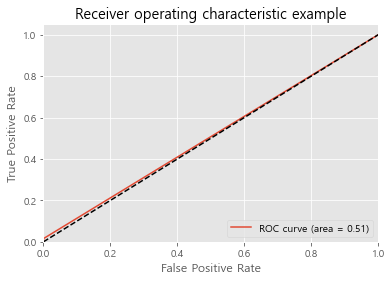

In [72]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression - 변수 중요도 확인

In [73]:
from matplotlib import pyplot

# get importance
importance = Logit.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.30206
Feature: 1, Score: 0.38729
Feature: 2, Score: 0.39307
Feature: 3, Score: 0.52519
Feature: 4, Score: 0.44371
Feature: 5, Score: 0.26948
Feature: 6, Score: 0.13636
Feature: 7, Score: 0.40580
Feature: 8, Score: 0.61689
Feature: 9, Score: -0.44865
Feature: 10, Score: -0.88008
Feature: 11, Score: -2.03307
Feature: 12, Score: -1.59180
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.52287
Feature: 15, Score: 0.01811
Feature: 16, Score: 1.78274
Feature: 17, Score: 0.15598
Feature: 18, Score: 0.34999
Feature: 19, Score: 0.94995
Feature: 20, Score: 0.00000
Feature: 21, Score: -0.74914
Feature: 22, Score: -0.05114
Feature: 23, Score: -0.44932
Feature: 24, Score: 1.11284
Feature: 25, Score: 3.34484
Feature: 26, Score: -0.74509
Feature: 27, Score: 0.96899
Feature: 28, Score: -0.22069
Feature: 29, Score: -0.20663
Feature: 30, Score: -0.22782
Feature: 31, Score: -0.21492
Feature: 32, Score: -0.29427
Feature: 33, Score: 0.12637
Feature: 34, Score: -0.23362
Feature: 35, Sco

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


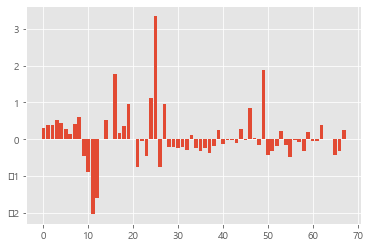

In [74]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Decision Tree

In [75]:
from sklearn import tree
Decision = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10, max_features= 3)
Decision.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=3,
                       random_state=10)

In [76]:
print("훈련 세트 정확도 : {:.5f}".format(Decision.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.5f}".format(Decision.score(X_test,y_test)))

훈련 세트 정확도 : 0.87052
테스트 세트 정확도 : 0.77248


In [77]:
y_pred = Decision.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.77


In [78]:
pred_probs = Decision.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [79]:
get_clf_eval(y_test, pred_probs)

오차행렬:
 [[17180    13]
 [ 5051    13]]

정확도: 0.7725
정밀도: 0.5000
재현율: 0.0026
F1: 0.0051
AUC: 0.5009


In [80]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

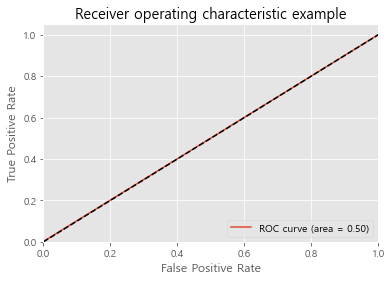

In [81]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Decision Tree - 변수 중요도

In [82]:
# get importance
importance =Decision.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00057
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00031
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01414
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00898
Feature: 25, Score: 0.88167
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00313
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00024
Fe

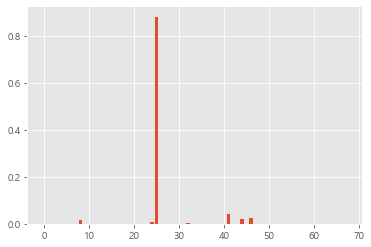

In [83]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Random Forest

In [84]:
forest = RandomForestClassifier(n_estimators=100,random_state=0,
                                max_depth = 5)
forest.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=5, random_state=0)

In [85]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.849
테스트 세트 정확도 : 0.776


In [86]:
pred_probs = forest.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [87]:
pred_probs

array([0., 0., 0., ..., 0., 0., 0.])

In [88]:
get_clf_eval(y_test, preds)

오차행렬:
 [[17185     8]
 [ 4988    76]]

정확도: 0.7755
정밀도: 0.9048
재현율: 0.0150
F1: 0.0295
AUC: 0.5073


In [89]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

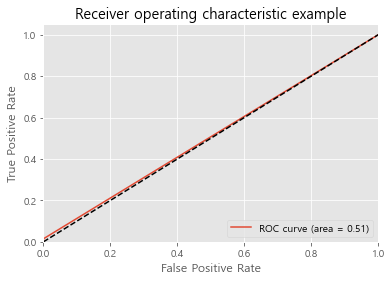

In [90]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [91]:
def plot_feature_importances_child(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)


# Random Forest - 특성 중요도

In [92]:
# get importance
importance = forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00510
Feature: 1, Score: 0.00237
Feature: 2, Score: 0.00159
Feature: 3, Score: 0.00048
Feature: 4, Score: 0.00177
Feature: 5, Score: 0.00055
Feature: 6, Score: 0.00320
Feature: 7, Score: 0.00761
Feature: 8, Score: 0.03510
Feature: 9, Score: 0.03779
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.00020
Feature: 12, Score: 0.00035
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00114
Feature: 15, Score: 0.00023
Feature: 16, Score: 0.12339
Feature: 17, Score: 0.01235
Feature: 18, Score: 0.00007
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00018
Feature: 23, Score: 0.00012
Feature: 24, Score: 0.03364
Feature: 25, Score: 0.34619
Feature: 26, Score: 0.00044
Feature: 27, Score: 0.00180
Feature: 28, Score: 0.00022
Feature: 29, Score: 0.00016
Feature: 30, Score: 0.00034
Feature: 31, Score: 0.00072
Feature: 32, Score: 0.00042
Feature: 33, Score: 0.00005
Feature: 34, Score: 0.00033
Feature: 35, Score: 0.00004
Fe

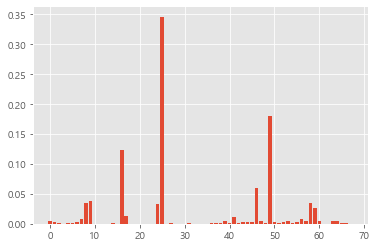

In [93]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# XGBOOST

In [124]:
import xgboost as xgb

epoch = 1000
learning_rate = 0.03
gamma = 0
subsampling = 0.6
max_depth = 5
xgb_model = xgboost.XGBClassifier(n_estimators = 100, learning_rate = learning_rate, 
                                 gamma = gamma, subsampling = subsampling,
                                 colsample_bytree = 1, max_depth = max_depth)

print(X_train.shape, y_train.shape)
xgb_model.fit(X_train, y_train)

(57838, 68) (57838, 1)
[15:31:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              subsampling=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [96]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [97]:
params = {'max_depth' : 4,
         'eta' : 0.005, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 ,
         'sub_sample' : 0.3,
         'min_child_weight' : 5,
         'num_boost_around' : 10}

num_rounds = 100

In [98]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[12:27:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stoppings, num_boost_around, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69011	eval-logloss:0.69073
[1]	train-logloss:0.68710	eval-logloss:0.68834
[2]	train-logloss:0.68411	eval-logloss:0.68596
[3]	train-logloss:0.68115	eval-logloss:0.68361
[4]	train-logloss:0.67823	eval-logloss:0.68128
[5]	train-logloss:0.67530	eval-logloss:0.67897
[6]	train-logloss:0.67246	eval-logloss:0.67671
[7]	train-logloss:0.66964	eval-logloss:0.67445
[8]	train-logloss:0.66682	eval-logloss:0.67221
[9]	train-logloss:0.66402	eval-logloss:0.67000
[10]	train-logloss:0.66126	eval-logloss:0.66781
[11]	train-logloss:0.65854	eval-logloss:0.66564
[12]	train-

In [99]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.33  0.33  0.33  0.33  0.33  0.399 0.33  0.527 0.33  0.527]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 1]


In [100]:
get_clf_eval(y_test, preds)

오차행렬:
 [[15970  1223]
 [ 2904  2160]]

정확도: 0.8146
정밀도: 0.6385
재현율: 0.4265
F1: 0.5114
AUC: 0.6777


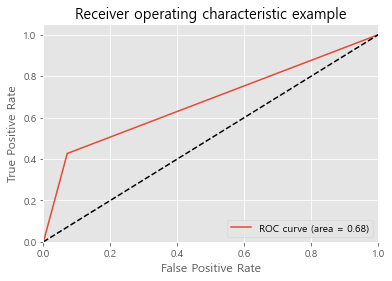

In [101]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# XGBOOST - 변수중요도

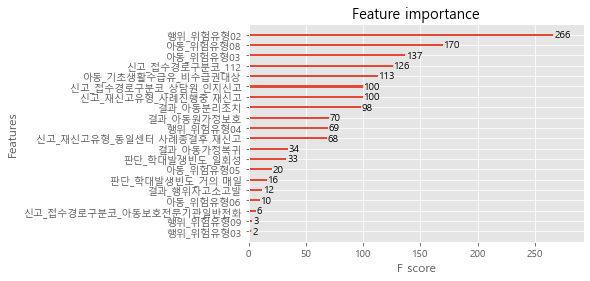

In [102]:
xgboost.plot_importance(xgb_model)

# SVM

In [103]:
# 시간걸림
from sklearn import svm

clf = svm.SVC(kernel ='linear',C=1,gamma=0.1)  
# C : 작게하면 train 분류 부정확하지만 margin크게 / 크게하면 margin작게 하지만 train분류 정확
# noise가 많은 데이터라면 C작게, Noise가 별로 없으면 C크게 하는게 좋다
clf.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, gamma=0.1, kernel='linear')

In [104]:
y_pred = clf.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.77


In [105]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.849
테스트 세트 정확도 : 0.776


In [106]:
get_clf_eval(y_test, y_pred)

오차행렬:
 [[17177    16]
 [ 5057     7]]

정확도: 0.7721
정밀도: 0.3043
재현율: 0.0014
F1: 0.0028
AUC: 0.5002


In [107]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

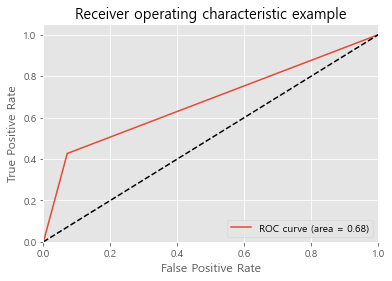

In [108]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# LightGBM

In [109]:
import lightgbm

print(lightgbm.__version__)

3.0.0


In [123]:
from lightgbm import LGBMClassifier

lgbm_wrapper=LGBMClassifier(n_estimators=400)

evals=[(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

preds=lgbm_wrapper.predict(X_test)
pred_proba=lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.517405
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.494489
[3]	valid_0's binary_logloss: 0.47763
[4]	valid_0's binary_logloss: 0.464243
[5]	valid_0's binary_logloss: 0.453821
[6]	valid_0's binary_logloss: 0.44438
[7]	valid_0's binary_logloss: 0.437074
[8]	valid_0's binary_logloss: 0.431099
[9]	valid_0's binary_logloss: 0.426441
[10]	valid_0's binary_logloss: 0.422126
[11]	valid_0's binary_logloss: 0.418694
[12]	valid_0's binary_logloss: 0.415765
[13]	valid_0's binary_logloss: 0.41353
[14]	valid_0's binary_logloss: 0.41227
[15]	valid_0's binary_logloss: 0.411276
[16]	valid_0's binary_logloss: 0.409777
[17]	valid_0's binary_logloss: 0.4091
[18]	valid_0's binary_logloss: 0.407969
[19]	valid_0's binary_logloss: 0.407465
[20]	valid_0's binary_logloss: 0.406966
[21]	valid_0's binary_logloss: 0.406351
[22]	valid_0's binary_logloss: 0.406104
[23]	valid_0's binary_logloss: 0.405066
[24]	valid_0's binary_logloss: 0.

In [111]:
get_clf_eval(y_test, preds)

오차행렬:
 [[16237   956]
 [ 3000  2064]]

정확도: 0.8223
정밀도: 0.6834
재현율: 0.4076
F1: 0.5106
AUC: 0.6760


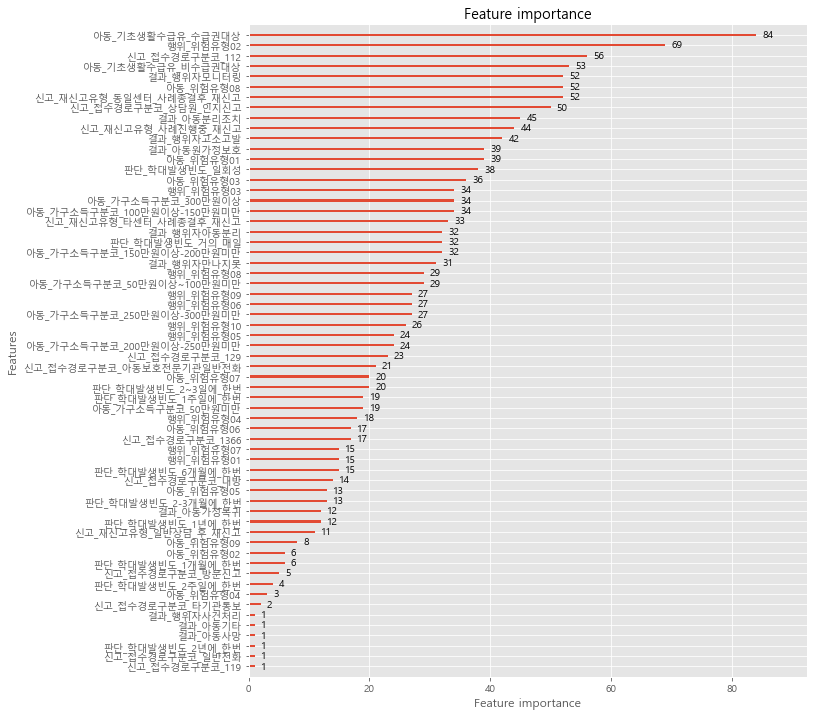

In [112]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

# Catboost

In [127]:
from catboost import CatBoostClassifier

In [141]:
cb_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=4, l2_leaf_reg=20, 
                              bootstrap_type='Bernoulli', subsample=0.6, eval_metric='RMSE', metric_period=50, 
                              od_type='Iter', od_wait=45, random_seed=17, allow_writing_files=False) 

cb_model.fit(X_train, y_train)

preds = cb_model.predict(X_test)

0:	learn: 0.4816289	total: 18.2ms	remaining: 18.1s
1:	learn: 0.4080336	total: 57ms	remaining: 28.4s
2:	learn: 0.3599602	total: 76.8ms	remaining: 25.5s
3:	learn: 0.3385252	total: 108ms	remaining: 26.9s
4:	learn: 0.3298050	total: 136ms	remaining: 27.1s
5:	learn: 0.3227767	total: 166ms	remaining: 27.5s
6:	learn: 0.3189784	total: 182ms	remaining: 25.9s
7:	learn: 0.3163039	total: 231ms	remaining: 28.6s
8:	learn: 0.3140455	total: 261ms	remaining: 28.7s
9:	learn: 0.3121527	total: 290ms	remaining: 28.7s
10:	learn: 0.3101794	total: 320ms	remaining: 28.8s
11:	learn: 0.3087421	total: 350ms	remaining: 28.8s
12:	learn: 0.3084594	total: 371ms	remaining: 28.2s
13:	learn: 0.3072642	total: 391ms	remaining: 27.5s
14:	learn: 0.3061108	total: 424ms	remaining: 27.9s
15:	learn: 0.3049934	total: 458ms	remaining: 28.2s
16:	learn: 0.3042375	total: 485ms	remaining: 28s
17:	learn: 0.3033069	total: 516ms	remaining: 28.1s
18:	learn: 0.3024952	total: 567ms	remaining: 29.3s
19:	learn: 0.3013318	total: 601ms	remainin

165:	learn: 0.2427314	total: 4.96s	remaining: 24.9s
166:	learn: 0.2424192	total: 4.99s	remaining: 24.9s
167:	learn: 0.2423186	total: 5.02s	remaining: 24.9s
168:	learn: 0.2421542	total: 5.04s	remaining: 24.8s
169:	learn: 0.2419158	total: 5.08s	remaining: 24.8s
170:	learn: 0.2415617	total: 5.11s	remaining: 24.8s
171:	learn: 0.2412278	total: 5.13s	remaining: 24.7s
172:	learn: 0.2410622	total: 5.17s	remaining: 24.7s
173:	learn: 0.2408029	total: 5.21s	remaining: 24.7s
174:	learn: 0.2405365	total: 5.24s	remaining: 24.7s
175:	learn: 0.2403791	total: 5.27s	remaining: 24.7s
176:	learn: 0.2401696	total: 5.32s	remaining: 24.7s
177:	learn: 0.2399588	total: 5.34s	remaining: 24.7s
178:	learn: 0.2397312	total: 5.38s	remaining: 24.7s
179:	learn: 0.2393760	total: 5.41s	remaining: 24.6s
180:	learn: 0.2391156	total: 5.45s	remaining: 24.7s
181:	learn: 0.2388857	total: 5.48s	remaining: 24.6s
182:	learn: 0.2387418	total: 5.53s	remaining: 24.7s
183:	learn: 0.2384448	total: 5.56s	remaining: 24.7s
184:	learn: 

331:	learn: 0.2150344	total: 10.7s	remaining: 21.5s
332:	learn: 0.2149494	total: 10.7s	remaining: 21.5s
333:	learn: 0.2147827	total: 10.7s	remaining: 21.4s
334:	learn: 0.2147154	total: 10.8s	remaining: 21.4s
335:	learn: 0.2145900	total: 10.8s	remaining: 21.3s
336:	learn: 0.2143992	total: 10.8s	remaining: 21.3s
337:	learn: 0.2142793	total: 10.9s	remaining: 21.3s
338:	learn: 0.2142161	total: 10.9s	remaining: 21.2s
339:	learn: 0.2141341	total: 10.9s	remaining: 21.2s
340:	learn: 0.2140867	total: 11s	remaining: 21.2s
341:	learn: 0.2139141	total: 11s	remaining: 21.2s
342:	learn: 0.2138939	total: 11s	remaining: 21.1s
343:	learn: 0.2138479	total: 11.1s	remaining: 21.1s
344:	learn: 0.2137324	total: 11.1s	remaining: 21.1s
345:	learn: 0.2137105	total: 11.2s	remaining: 21.1s
346:	learn: 0.2135605	total: 11.2s	remaining: 21.1s
347:	learn: 0.2134942	total: 11.2s	remaining: 21.1s
348:	learn: 0.2134088	total: 11.3s	remaining: 21s
349:	learn: 0.2133299	total: 11.3s	remaining: 21s
350:	learn: 0.2132106	

493:	learn: 0.2008931	total: 15.9s	remaining: 16.3s
494:	learn: 0.2008508	total: 16s	remaining: 16.3s
495:	learn: 0.2007543	total: 16s	remaining: 16.2s
496:	learn: 0.2007390	total: 16s	remaining: 16.2s
497:	learn: 0.2007096	total: 16s	remaining: 16.1s
498:	learn: 0.2006148	total: 16s	remaining: 16.1s
499:	learn: 0.2004979	total: 16.1s	remaining: 16.1s
500:	learn: 0.2004469	total: 16.1s	remaining: 16.1s
501:	learn: 0.2004032	total: 16.2s	remaining: 16s
502:	learn: 0.2002782	total: 16.2s	remaining: 16s
503:	learn: 0.2002293	total: 16.2s	remaining: 16s
504:	learn: 0.2001753	total: 16.3s	remaining: 15.9s
505:	learn: 0.2000972	total: 16.3s	remaining: 15.9s
506:	learn: 0.2000544	total: 16.3s	remaining: 15.9s
507:	learn: 0.1999855	total: 16.3s	remaining: 15.8s
508:	learn: 0.1999505	total: 16.4s	remaining: 15.8s
509:	learn: 0.1999221	total: 16.4s	remaining: 15.8s
510:	learn: 0.1998892	total: 16.4s	remaining: 15.7s
511:	learn: 0.1998724	total: 16.4s	remaining: 15.7s
512:	learn: 0.1998239	total:

658:	learn: 0.1908161	total: 20.8s	remaining: 10.8s
659:	learn: 0.1907680	total: 20.8s	remaining: 10.7s
660:	learn: 0.1907514	total: 20.8s	remaining: 10.7s
661:	learn: 0.1906655	total: 20.8s	remaining: 10.6s
662:	learn: 0.1906322	total: 20.9s	remaining: 10.6s
663:	learn: 0.1905518	total: 20.9s	remaining: 10.6s
664:	learn: 0.1905150	total: 20.9s	remaining: 10.5s
665:	learn: 0.1904629	total: 20.9s	remaining: 10.5s
666:	learn: 0.1904083	total: 21s	remaining: 10.5s
667:	learn: 0.1903644	total: 21s	remaining: 10.4s
668:	learn: 0.1902947	total: 21s	remaining: 10.4s
669:	learn: 0.1902285	total: 21.1s	remaining: 10.4s
670:	learn: 0.1901793	total: 21.1s	remaining: 10.3s
671:	learn: 0.1901230	total: 21.1s	remaining: 10.3s
672:	learn: 0.1900967	total: 21.1s	remaining: 10.3s
673:	learn: 0.1900554	total: 21.2s	remaining: 10.3s
674:	learn: 0.1900224	total: 21.2s	remaining: 10.2s
675:	learn: 0.1899873	total: 21.3s	remaining: 10.2s
676:	learn: 0.1899674	total: 21.3s	remaining: 10.2s
677:	learn: 0.1899

821:	learn: 0.1843464	total: 25.8s	remaining: 5.58s
822:	learn: 0.1843171	total: 25.8s	remaining: 5.55s
823:	learn: 0.1842792	total: 25.9s	remaining: 5.52s
824:	learn: 0.1842344	total: 25.9s	remaining: 5.49s
825:	learn: 0.1841635	total: 25.9s	remaining: 5.46s
826:	learn: 0.1841344	total: 26s	remaining: 5.43s
827:	learn: 0.1841125	total: 26s	remaining: 5.4s
828:	learn: 0.1840606	total: 26s	remaining: 5.37s
829:	learn: 0.1840288	total: 26.1s	remaining: 5.34s
830:	learn: 0.1840157	total: 26.1s	remaining: 5.3s
831:	learn: 0.1839711	total: 26.1s	remaining: 5.27s
832:	learn: 0.1839560	total: 26.1s	remaining: 5.24s
833:	learn: 0.1839333	total: 26.2s	remaining: 5.21s
834:	learn: 0.1838987	total: 26.2s	remaining: 5.17s
835:	learn: 0.1838544	total: 26.2s	remaining: 5.15s
836:	learn: 0.1837624	total: 26.3s	remaining: 5.12s
837:	learn: 0.1837306	total: 26.3s	remaining: 5.08s
838:	learn: 0.1837185	total: 26.3s	remaining: 5.06s
839:	learn: 0.1836681	total: 26.4s	remaining: 5.03s
840:	learn: 0.183647

980:	learn: 0.1792255	total: 30.7s	remaining: 595ms
981:	learn: 0.1791945	total: 30.8s	remaining: 564ms
982:	learn: 0.1791778	total: 30.8s	remaining: 533ms
983:	learn: 0.1791757	total: 30.8s	remaining: 501ms
984:	learn: 0.1791664	total: 30.8s	remaining: 470ms
985:	learn: 0.1791480	total: 30.9s	remaining: 439ms
986:	learn: 0.1790991	total: 30.9s	remaining: 407ms
987:	learn: 0.1790811	total: 31s	remaining: 376ms
988:	learn: 0.1790746	total: 31s	remaining: 345ms
989:	learn: 0.1790489	total: 31s	remaining: 313ms
990:	learn: 0.1790008	total: 31.1s	remaining: 282ms
991:	learn: 0.1789783	total: 31.1s	remaining: 251ms
992:	learn: 0.1789292	total: 31.1s	remaining: 219ms
993:	learn: 0.1789117	total: 31.2s	remaining: 188ms
994:	learn: 0.1788940	total: 31.2s	remaining: 157ms
995:	learn: 0.1788626	total: 31.2s	remaining: 125ms
996:	learn: 0.1788258	total: 31.2s	remaining: 94ms
997:	learn: 0.1788082	total: 31.3s	remaining: 62.7ms
998:	learn: 0.1787880	total: 31.3s	remaining: 31.4ms
999:	learn: 0.178

In [142]:
get_clf_eval(y_test, preds)

오차행렬:
 [[15872  1321]
 [ 2989  2075]]

정확도: 0.8064
정밀도: 0.6110
재현율: 0.4098
F1: 0.4905
AUC: 0.6665
